In [1]:

import os
from dotenv import load_dotenv
load_dotenv()

True

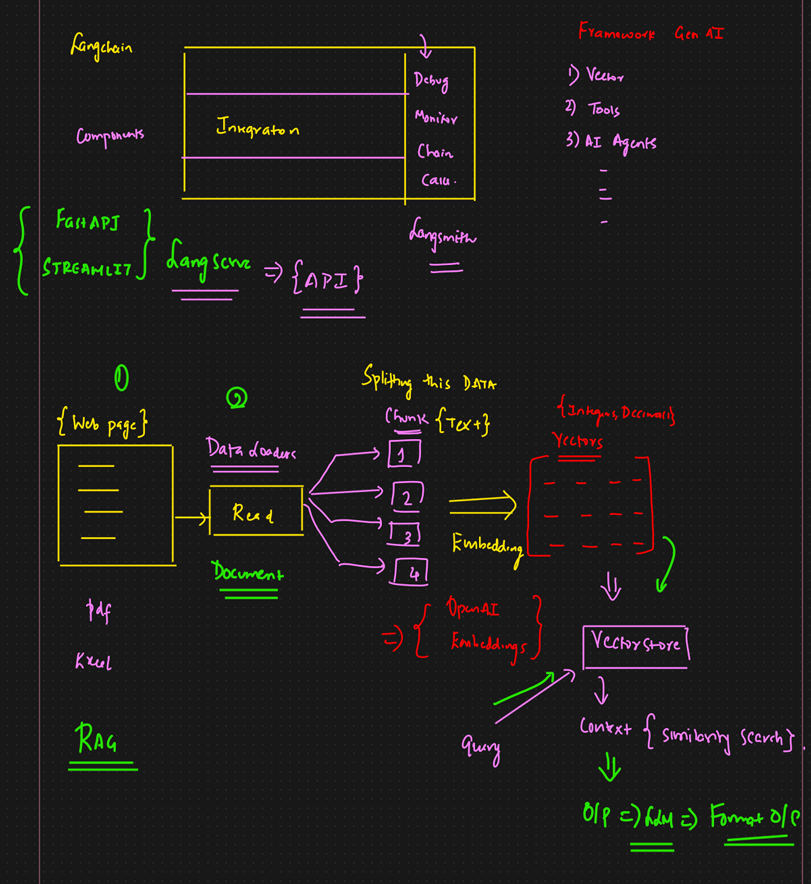

 loading web 

In [2]:
from langchain_community.document_loaders import WebBaseLoader

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [3]:
loader=WebBaseLoader("https://indianexpress.com/article/sports/ipl/ipl-2025-points-table-orange-cap-purple-cap-after-csk-vs-kkr-match-25-kolkata-knight-riders-rise-to-3rd-spot-9939420/")
loader

In [4]:
document=loader.load()
document

[Document(metadata={'source': 'https://indianexpress.com/article/sports/ipl/ipl-2025-points-table-orange-cap-purple-cap-after-csk-vs-kkr-match-25-kolkata-knight-riders-rise-to-3rd-spot-9939420/', 'title': 'IPL 2025 Points Table: Kolkata Knight Riders rise to 3rd spot | Ipl News - The Indian Express', 'description': 'Kolkata Knight Riders rose three places to be third in the Indian Premier League standings after their victory over the Chennai Super Kings in an IPL 2025 game on Friday. Thanks to the stellar performance by their bowlers, KKR restricted CSK to just 103/9 in their 20 overs.', 'language': 'en'}, page_content="\n\n\n\n\n\nIPL 2025 Points Table: Kolkata Knight Riders rise to 3rd spot | Ipl News - The Indian Express\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\nskip to content\n\n\n\n\n\n\n\nSections\n\n\n\n\n\n\n\n\n\n\nEnglishதமிழ்বাংলাമലയാളംગુજરાતીहिंदीमराठीBusinessबिज़नेस \n\n\n\n\nNewsletters The Indian Expr

go to the requirements and import bs4


In [5]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200)
documents=text_splitter.split_documents(document)
documents

[Document(metadata={'source': 'https://indianexpress.com/article/sports/ipl/ipl-2025-points-table-orange-cap-purple-cap-after-csk-vs-kkr-match-25-kolkata-knight-riders-rise-to-3rd-spot-9939420/', 'title': 'IPL 2025 Points Table: Kolkata Knight Riders rise to 3rd spot | Ipl News - The Indian Express', 'description': 'Kolkata Knight Riders rose three places to be third in the Indian Premier League standings after their victory over the Chennai Super Kings in an IPL 2025 game on Friday. Thanks to the stellar performance by their bowlers, KKR restricted CSK to just 103/9 in their 20 overs.', 'language': 'en'}, page_content='IPL 2025 Points Table: Kolkata Knight Riders rise to 3rd spot | Ipl News - The Indian Express\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\nskip to content\n\n\n\n\n\n\n\nSections\n\n\n\n\n\n\n\n\n\n\nEnglishதமிழ்বাংলাമലയാളംગુજરાતીहिंदीमराठीBusinessबिज़नेस \n\n\n\n\nNewsletters The Indian Express Newslett

we can use ollama,openai,groqu embidding techique


In [7]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings=HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

c:\New folder\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\New folder\venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\abhir\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see t

In [8]:
# Befor running this cell, make sure to install the required packages 
# go to requirements.txt and install the packages faiss-cpu using pip install -r requirements.txt

from langchain_community.vectorstores import FAISS

vectorstore=FAISS.from_documents(documents,embeddings)
vectorstore

c:\New folder\venv\Lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


In [9]:
query="What is the current points table of IPL 2025?"

result=vectorstore.similarity_search(query)
result[0].page_content

'IPL 2025 Points Table: Kolkata Knight Riders rise to 3rd spot | Ipl News - The Indian Express\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\nskip to content\n\n\n\n\n\n\n\nSections\n\n\n\n\n\n\n\n\n\n\nEnglishதமிழ்বাংলাമലയാളംગુજરાતીहिंदीमराठीBusinessबिज़नेस \n\n\n\n\nNewsletters The Indian Express Newsletter. (Opens in new window) \n\n\n.(Opens in new window).(Opens in new window).(Opens in new window).(Opens in new window) \n\n\n\n\n\n\nEditionIndiaInternational .(Open in new tab) \n\n ePaper .Opens in new window \n Today’s Paper .Opens in new window\n\n\n\n\n\n\n\n\nJournalism of Courage'

In [10]:
from langchain_core.prompts import ChatPromptTemplate

prompt=ChatPromptTemplate.from_template(
    """
Answer the following question based only on the provided context:
<context>
{context}
</context>


"""
)

In [9]:
prompt

ChatPromptTemplate(input_variables=['context'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context'], input_types={}, partial_variables={}, template='\nAnswer the following question based only on the provided context:\n<context>\n{context}\n</context>\n\n\n'), additional_kwargs={})])

In [11]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

In [ ]:
######################################3
# retriever=vectorstore.as_retriever()

# from langchain.chains.combine_documents import create_stuff_documents_chain
# document_chain=create_stuff_documents_chain(llm,prompt)
# document_chain

RunnableBinding(bound=RunnableBinding(bound=RunnableAssign(mapper={
  context: RunnableLambda(format_docs)
}), kwargs={}, config={'run_name': 'format_inputs'}, config_factories=[])
| ChatPromptTemplate(input_variables=['context'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context'], input_types={}, partial_variables={}, template='\nAnswer the following question based only on the provided context:\n<context>\n{context}\n</context>\n\n\n'), additional_kwargs={})])
| ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000281A6F8D550>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000281A6F8E6C0>, model_name='llama-3.1-8b-instant', temperature=1e-08, model_kwargs={}, groq_api_key=SecretStr('**********'))
| StrOutputParser(), kwargs={}, config={'run_name': 'stuff_documents_chain'}, config_factories=[])

In [ ]:
####################################################
# from langchain.chains import create_retrieval_chain

# retrieval_chain=create_retrieval_chain(retriever,document_chain)
# retrieval_chain

RunnableBinding(bound=RunnableAssign(mapper={
  context: RunnableBinding(bound=RunnableLambda(lambda x: x['input'])
           | VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x00000281A57D7C50>, search_kwargs={}), kwargs={}, config={'run_name': 'retrieve_documents'}, config_factories=[])
})
| RunnableAssign(mapper={
    answer: RunnableBinding(bound=RunnableBinding(bound=RunnableAssign(mapper={
              context: RunnableLambda(format_docs)
            }), kwargs={}, config={'run_name': 'format_inputs'}, config_factories=[])
            | ChatPromptTemplate(input_variables=['context'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context'], input_types={}, partial_variables={}, template='\nAnswer the following question based only on the provided context:\n<context>\n{context}\n</context>\n\n\n'), additional_kwargs={})])
         

In [ ]:
###############################################333
# retrieval_chain.invoke({'input':"what is the current points table of IPL 2025?"})


{'input': 'what is the current points table of IPL 2025?',
 'context': [Document(id='223fc69a-47e6-40e3-84d8-3f9d735bda33', metadata={'source': 'https://indianexpress.com/article/sports/ipl/ipl-2025-points-table-orange-cap-purple-cap-after-csk-vs-kkr-match-25-kolkata-knight-riders-rise-to-3rd-spot-9939420/', 'title': 'IPL 2025 Points Table, Orange Cap, Purple Cap After CSK vs KKR Today Match: Kolkata Knight Riders rise to 3rd spot', 'description': "IPL 2025 Points Table, Top Batters Orange Cap, Top Bowlers Purple Cap, Team Rankings and Standing List Today Update: Mahendra Singh Dhoni's first match as captain this season ended in defeat as Chennai Super Kings stay rooted to ninth spot after their fifth defeat in a row.", 'language': 'en'}, page_content='IPL 2025 Points Table, Orange Cap, Purple Cap After CSK vs KKR Today Match: Kolkata Knight Riders rise to 3rd spot\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\nskip to content\n\n\n

In [29]:
from langchain.chains import RetrievalQA
from langchain_community.llms import Ollama
from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.vectorstores import FAISS

# Initialize Ollama LLM (use an available model like mistral, llama3, etc.)

# Use FAISS as a retriever
retriever = vectorstore.as_retriever()

# Create a RetrievalQA chain
qa_chain = RetrievalQA.from_chain_type(llm, retriever=retriever)

# Ask a query
query = input("Enter your query: ")
answer = qa_chain.run(query)

print(answer)
pretty_print(answer)

According to the text, CSK lost the game to KKR due to a poor batting performance. They were restricted to just 103/9 in their 20 overs, with Shivam Dube top-scoring with 31 and Vijay Shankar scoring 29 runs. This was not enough to put up a competitive total, and KKR easily chased down the target with 8 wickets in hand and 59 balls to spare.

=== Answer ===
According to the text, CSK lost the game to KKR due to a poor batting performance. They were restricted to just 103/9 in their 20 overs, with Shivam Dube top-scoring with 31 and Vijay Shankar scoring 29 runs. This was not enough to put up a competitive total, and KKR easily chased down the target with 8 wickets in hand and 59 balls to spare.

